<a href="https://colab.research.google.com/github/glcn35/Project/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv("/content/sample_data/covid_19_clean_complete.csv")
df.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
34317,NaN,Honduras,15.200000,-86.241900,2020-06-01,5362,217,549,4596,Americas
1190,NaN,Liberia,6.428055,-9.429499,2020-01-26,0,0,0,0,Africa
13209,NaN,Mongolia,46.862500,103.846700,2020-03-12,1,0,0,1,Western Pacific
21941,NaN,Azerbaijan,40.143100,47.576900,2020-04-15,1253,13,404,836,Europe
48924,NaN,Georgia,42.315400,43.356900,2020-07-27,1137,16,922,199,Europe


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [14]:
df[["Confirmed","Deaths","Recovered","Active"]].sum()

Confirmed    828508482
Deaths        43384903
Recovered    388408229
Active       396715350
dtype: int64

In [18]:
df.Date.nunique()

188

In [20]:
df["Country/Region"].value_counts()

China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: Country/Region, Length: 187, dtype: int64

In [22]:
df["Country/Region"].nunique()

187

In [26]:
df["WHO Region"].value_counts()

Europe                   15040
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: WHO Region, dtype: int64

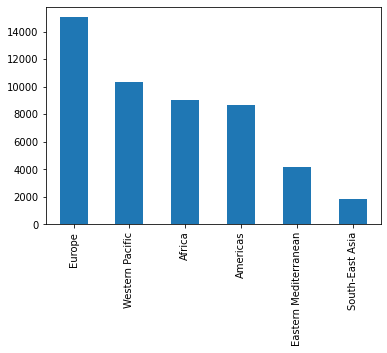

In [32]:
df["WHO Region"].value_counts().plot.bar();

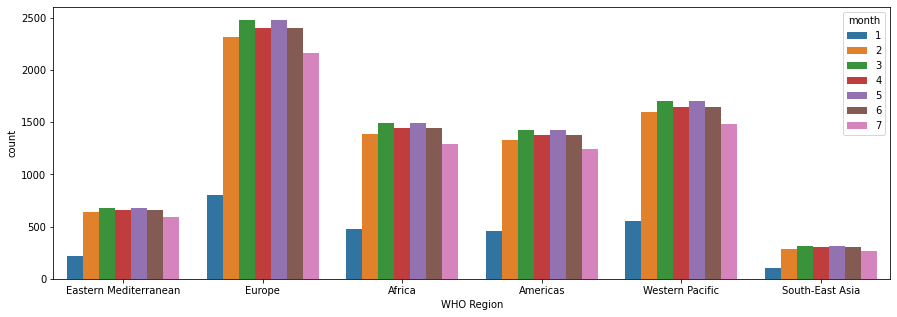

In [125]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=df["WHO Region"],hue="month",data=df);

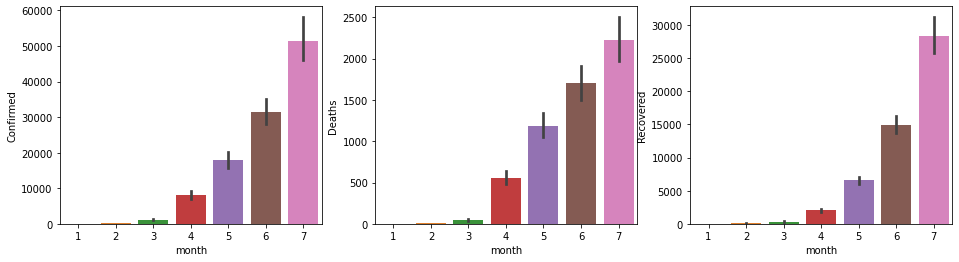

In [132]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
sns.barplot(x="month", y="Confirmed", data=df,ax=ax[0])
sns.barplot(x="month", y="Deaths", data=df,ax=ax[1])
sns.barplot(x="month", y="Recovered", data=df,ax=ax[2]);

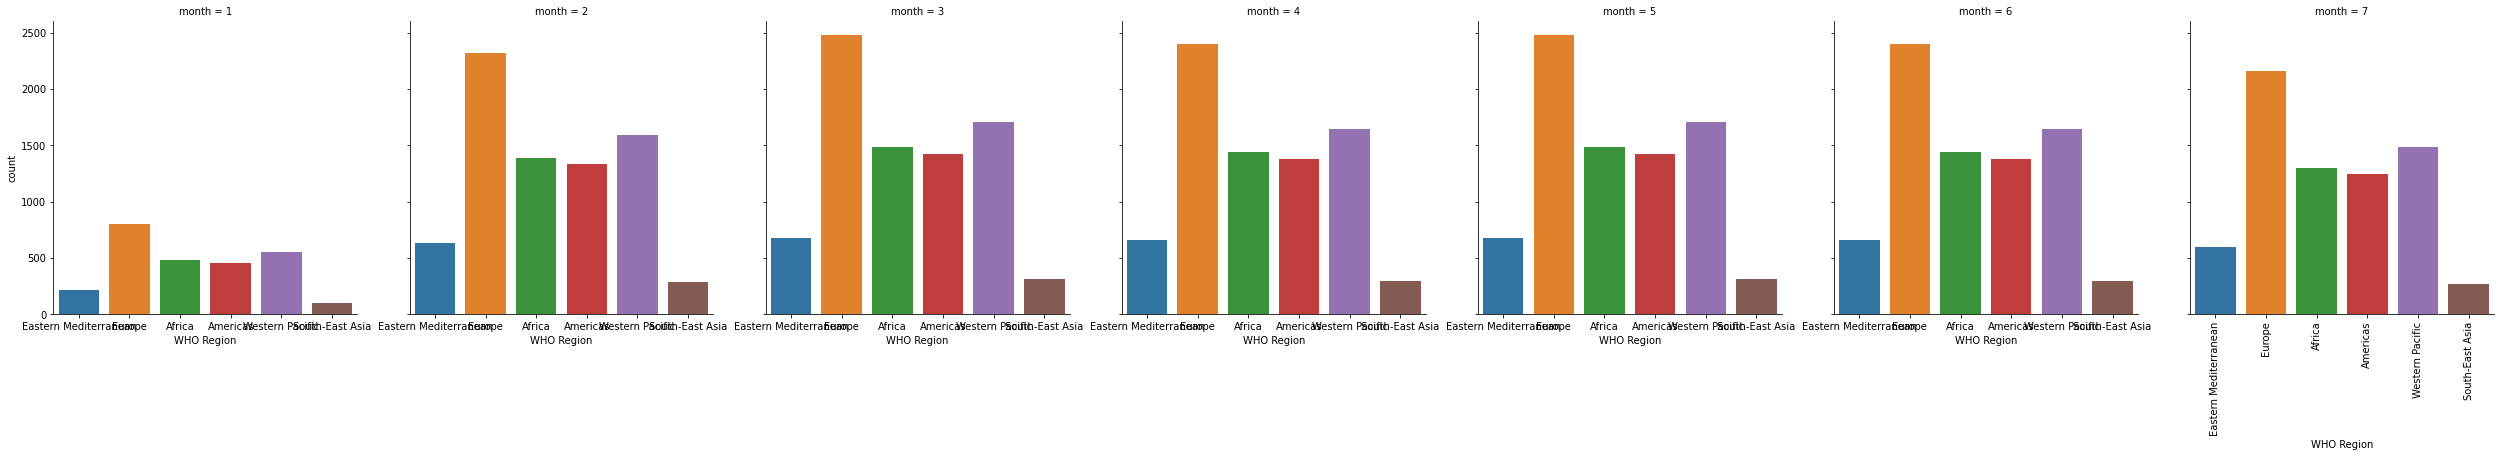

In [113]:
sns.catplot(x="WHO Region",col="month", data=df,kind="count")
plt.xticks(rotation='vertical');

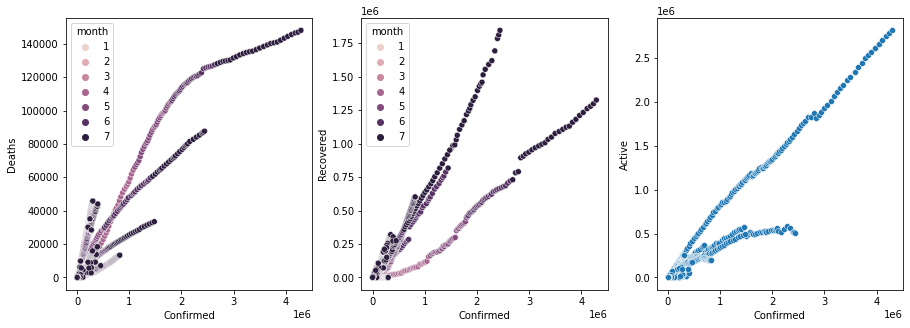

In [123]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x="Confirmed",y="Deaths",data=df,ax=ax[0],hue="month")
sns.scatterplot(x="Confirmed",y="Recovered",data=df,ax=ax[1],hue="month")
sns.scatterplot(x="Confirmed",y="Active",data=df,ax=ax[2]);

In [66]:
df.groupby("Date")["Confirmed"].sum().tail(10)

Date
2020-07-18    14292198
2020-07-19    14506845
2020-07-20    14713623
2020-07-21    14947078
2020-07-22    15227725
2020-07-23    15510481
2020-07-24    15791645
2020-07-25    16047190
2020-07-26    16251796
2020-07-27    16480485
Name: Confirmed, dtype: int64

In [59]:
df.groupby("Date")["Confirmed"].sum().sum()

828508482

In [65]:
(df.groupby("Date")["Confirmed"].sum().tail(10).sum()/df.groupby("Date")["Confirmed"].sum().sum())

0.18559745535592476

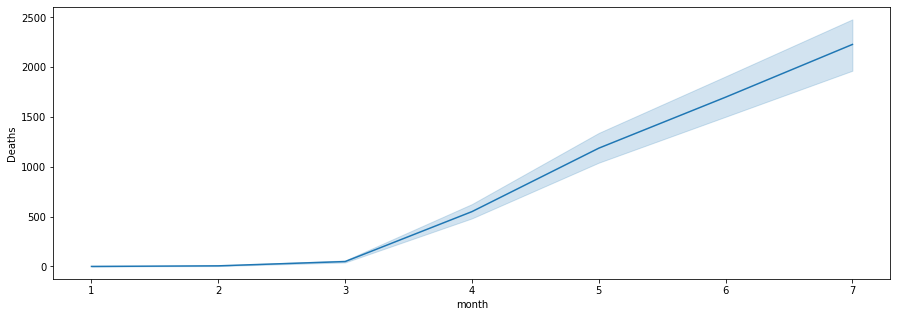

In [119]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='Deaths',data=df);

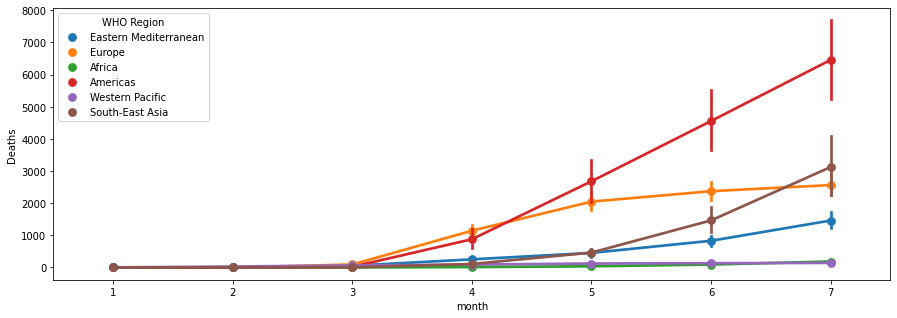

In [116]:
plt.figure(figsize=(15, 5))
sns.pointplot(x='month', y='Deaths',data=df,hue="WHO Region");

In [81]:
df["Date"]=pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [86]:
df.Date.max()

Timestamp('2020-07-27 00:00:00')

In [87]:
df.Date.min()

Timestamp('2020-01-22 00:00:00')

In [88]:
df.Date.max()-df.Date.min()

Timedelta('187 days 00:00:00')

In [98]:
df["month"]=df.Date.dt.month
df["month"]

0        1
1        1
2        1
3        1
4        1
        ..
49063    7
49064    7
49065    7
49066    7
49067    7
Name: month, Length: 49068, dtype: int64